<a href="https://colab.research.google.com/github/shivkumarganesh/Advance-Deep-Learning/blob/main/Assignment%204/Deep_ViML_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deep_autoviml

     |████████████████████████████████| 139 kB 8.5 MB/s 
     |████████████████████████████████| 14.5 MB 34 kB/s 
     |████████████████████████████████| 4.3 MB 79.8 MB/s 
     |████████████████████████████████| 454.4 MB 9.8 kB/s 
     |████████████████████████████████| 23.2 MB 1.5 MB/s 
     |████████████████████████████████| 170 kB 61.8 MB/s 
     |████████████████████████████████| 308 kB 60.4 MB/s 
     |████████████████████████████████| 4.0 MB 50.1 MB/s 
     |████████████████████████████████| 462 kB 67.1 MB/s 
     |████████████████████████████████| 1.2 MB 32.7 MB/s 
     |████████████████████████████████| 209 kB 65.3 MB/s 
     |████████████████████████████████| 80 kB 11.9 MB/s 
     |████████████████████████████████| 75 kB 6.1 MB/s 
     |████████████████████████████████| 111 kB 55.7 MB/s 
     |████████████████████████████████| 144 kB 66.5 MB/s 
     |████████████████████████████████| 49 kB 8.4 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 s

In [3]:
from deep_autoviml import deep_autoviml as deepauto
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Imported deep_auto_viml. version=0.0.68
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


# Defining Hyperparameters


In [1]:
BATCHSIZE = 256
CLASSES = 10
EPOCHS = 3
NUM_TRIALS = 5

# Loading and Downloading Data

In [3]:
!pip install kaggle

In [8]:
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d arkhoshghalb/twitter-sentiment-analysis-hatred-speech

 53% 1.00M/1.89M [00:00<00:00, 5.68MB/s]
100% 1.89M/1.89M [00:00<00:00, 9.26MB/s]


In [10]:
!unzip /content/twitter-sentiment-analysis-hatred-speech.zip

Archive:  /content/twitter-sentiment-analysis-hatred-speech.zip
  inflating: test.csv                
  inflating: train.csv               


# Inspecting the data

In [4]:
datapath = '/content/'
sep = ','
filename = 'train.csv'
df = pd.read_csv(datapath+filename,sep=sep)
target = 'label'
print(df.shape)
df.head(1)

(31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Adjusting the Parameters

In [5]:
keras_model_type =  "USE" ## always try "auto" first, then "basic", "deep", "BERT", "USE", cnn1", "LSTM" etc.
keras_options = {"early_stopping": True, 'epochs': 3, 'steps_per_epoch': 15, 'class_weight': True}  ### always set early_stopping to True first and then change it to False
model_options = {'tuner':"storm", "max_trials":10, }

## always set the tuner to "storm" first and then "optuna"
#### You always need 15 max_trials to get something decent #####
trainfile = datapath+filename

# Training the model

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    epochs : 3
    steps_per_epoch : 15
    class_weight : True
    early_stopping : True
Using following model_options given as input:
    max_trials : 10
    tuner : storm
Max Trials : 10. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows > maxrows, loading a random sample of 10000 rows into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
Loaded a small data sample of size = (10000, 3) into pandas dataframe to analyze...
    Classifying v

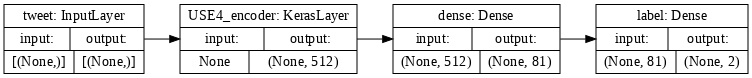


#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a USE model option...
    class_weights: {0: 1.0, 1: 7.256894049346879}
    original datasize = 31963, initial batchsize = 32
    recommended steps per epoch = 499
    recommended OneCycle steps = 2997
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 3, steps per epoch = 15

Splitting train into 80+20 percent: train and validation data
    Splitting validation 20 into 10+10 percent: valid and heldout data
    shuffle size = 31963
Model tra

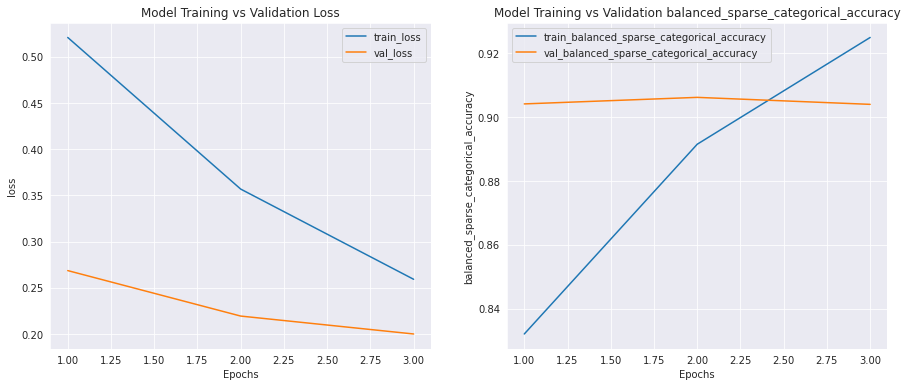


###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: label
#################################################################


    Accuracy          = 90.3%
    Balanced Accuracy = 89.7%
    Precision         = 40.3%
    Average Precision = 69.7%
    Recall            = 88.9%
    F1 Score          = 55.5%
    ROC AUC           = 96.1%
#####################################################

Training on full train dataset for -7 epochs. This will take time...
    completed. Time taken (in mins) = 0


TypeError: ignored

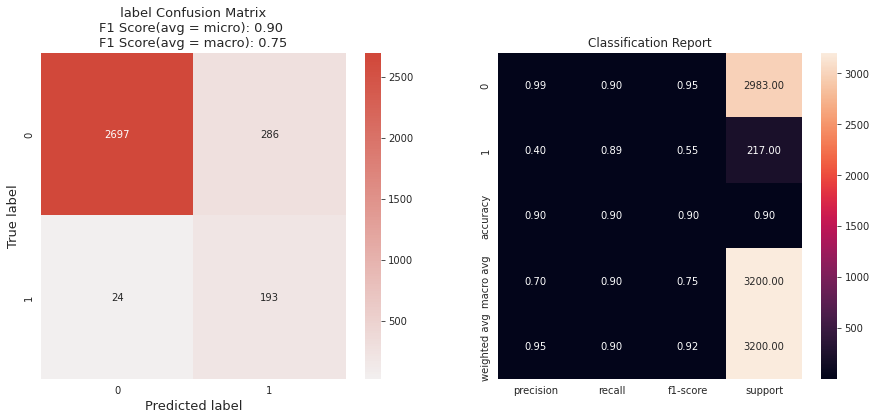

In [13]:
model, dicti = deepauto.fit(trainfile, target, keras_model_type=keras_model_type, save_model_flag=False, model_options=model_options,keras_options=keras_options, use_my_model='/content/', verbose=2)

In [14]:
filename = 'test.csv'
testfile = datapath+filename

In [ ]:
predictions = deepauto.predict(model, project_name='churn_1', test_dataset=testfile,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=dicti)